In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px

In [ ]:
# Charger la table "title_basics"

title_basics = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep = '\t', index_col=0, low_memory=False)

In [ ]:
# Charger la table "title_ratings"

title_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t', index_col=0, low_memory=False)

#Principales infos

In [ ]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8468615 entries, tt0000001 to tt9916880
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   titleType       object
 1   primaryTitle    object
 2   originalTitle   object
 3   isAdult         object
 4   startYear       object
 5   endYear         object
 6   runtimeMinutes  object
 7   genres          object
dtypes: object(8)
memory usage: 581.5+ MB


In [ ]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202679 entries, tt0000001 to tt9916778
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   averageRating  1202679 non-null  float64
 1   numVotes       1202679 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 27.5+ MB


In [ ]:
title_basics.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
title_ratings.head()

,averageRating,numVotes
tconst,,
tt0000001,5.7,1836
tt0000002,6.0,236
tt0000003,6.5,1596
tt0000004,6.0,153
tt0000005,6.2,2412


In [ ]:
# Copier le dataset

title_basics1 = title_basics.copy()

#Valeurs manquantes

In [ ]:
title_basics1 = title_basics1.replace('\\N', np.NaN)

In [ ]:
title_basics1.isna().sum()

titleType               0
primaryTitle            9
originalTitle           9
isAdult                 1
startYear         1028531
endYear           8384656
runtimeMinutes    6103771
genres             391200
dtype: int64

In [ ]:
# % de valeurs manquantes dans chaque colonne

((title_basics1.isna().sum()/ title_basics1.shape[0]) *100).sort_values()

titleType          0.000000
isAdult            0.000012
primaryTitle       0.000106
originalTitle      0.000106
genres             4.619409
startYear         12.145209
runtimeMinutes    72.075198
endYear           99.008586
dtype: float64

In [ ]:
title_ratings.isna().sum()

averageRating    0
numVotes         0
dtype: int64

In [ ]:
# % de valeurs manquantes dans chaque colonne

((title_ratings.isna().sum()/ title_ratings.shape[0]) *100).sort_values()

averageRating    0.0
numVotes         0.0
dtype: float64

#Appliquer des filtres sur title_basics pour pouvoir le manipuler plus facilement 


In [ ]:
# Filtre pour ne garder que les films grand public (hors films adultes etc.)

title_basics1 = title_basics1[title_basics1.isAdult !="1"]

In [ ]:
# Filtre pour ne garder que les films (hors séries etc.)

title_basics1 = title_basics1.loc[title_basics1['titleType'] == 'movie',:]

#Distribution des notes de films 


In [ ]:
title_ratings['averageRating'].value_counts()

7.2    43261
7.6    41757
7.8    41700
7.0    41240
7.4    41228
       ...  
1.7      439
1.5      380
1.4      369
1.1      318
1.3      278
Name: averageRating, Length: 91, dtype: int64

In [ ]:
title_ratings['averageRating'].describe()

count    1.202679e+06
mean     6.923080e+00
std      1.394924e+00
min      1.000000e+00
25%      6.200000e+00
50%      7.100000e+00
75%      7.900000e+00
max      1.000000e+01
Name: averageRating, dtype: float64

In [ ]:
# Visualisation nombre de films par notes 

# Même forme que la courbe gaussienne 

fig = px.histogram(title_ratings, x="averageRating", color="averageRating")

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

px.defaults.width = 1200
px.defaults.height = 800

fig.update_xaxes(title_text='Average Rating	')

fig.update_yaxes(title_text='Numbers of movies')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

#Merge des deux tables 

In [ ]:
# Merge avec inner pour garder seulement les données communes aux deux tables 

title_basics_plus_title_ratings = pd.merge(title_basics1, title_ratings, how='inner', on= 'tconst')

In [ ]:
title_basics_plus_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266287 entries, tt0000502 to tt9916538
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   titleType       266287 non-null  object 
 1   primaryTitle    266287 non-null  object 
 2   originalTitle   266287 non-null  object 
 3   isAdult         266287 non-null  object 
 4   startYear       266262 non-null  object 
 5   endYear         0 non-null       object 
 6   runtimeMinutes  239705 non-null  object 
 7   genres          256275 non-null  object 
 8   averageRating   266287 non-null  float64
 9   numVotes        266287 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 22.3+ MB


In [ ]:
title_basics_plus_title_ratings.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN,4.5,14
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography",6.1,736
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama,5.2,16
tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,NaN,NaN,Drama,4.5,23
tt0000630,movie,Hamlet,Amleto,0,1908,NaN,NaN,Drama,3.8,23


#TOP

In [ ]:
#Tri par meilleures notes seulement 

title_basics_plus_title_ratings.sort_values(by=['averageRating'], ascending=False)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt11926728,movie,Days of Géants,Days of Géants,0,2019,NaN,71,"Documentary,Sport",10.0,201
tt11341770,movie,Once Upon a Time in the City on the Stone,Once Upon a Time in the City on the Stone,0,2019,NaN,103,"Comedy,Crime",10.0,5
tt4428002,movie,I Chose Life: Stories of Suicide and Survival,I Chose Life: Stories of Suicide and Survival,0,2020,NaN,100,Documentary,10.0,6
tt10663998,movie,Widow of the Revolution: The Anna Larina Story,Widow of the Revolution: The Anna Larina Story,0,2000,NaN,NaN,Documentary,10.0,23
tt5926530,movie,The Illusion of Control,The Illusion of Control,0,2021,NaN,94,"Drama,Thriller",10.0,31
...,...,...,...,...,...,...,...,...,...,...
tt8313262,movie,Glaza i mir. Chast 1,Glaza i mir. Chast 1,0,2018,NaN,90,Drama,1.0,30
tt1932655,movie,It's a Kid's World,It's a Kid's World,0,2011,NaN,NaN,Family,1.0,370
tt7923374,movie,Badang,Badang,0,2018,NaN,105,"Action,Comedy,Fantasy",1.0,745


In [ ]:
#Tri par nombre de votes seulement 

title_basics_plus_title_ratings.sort_values(by=['numVotes'], ascending=False)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,NaN,142,Drama,9.3,2486414
tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,NaN,152,"Action,Crime,Drama",9.0,2440141
tt1375666,movie,Inception,Inception,0,2010,NaN,148,"Action,Adventure,Sci-Fi",8.8,2189734
tt0137523,movie,Fight Club,Fight Club,0,1999,NaN,139,Drama,8.8,1959020
tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,NaN,154,"Crime,Drama",8.9,1923329
...,...,...,...,...,...,...,...,...,...,...
tt8836604,movie,Lazy Hitchhikers' Tour de Europe,Lazy Hitchhikers' Tour de Europe,0,2013,NaN,105,Documentary,6.8,5
tt5539404,movie,La nueva Medellín,La nueva Medellín,0,2016,NaN,85,Documentary,6.0,5
tt8481472,movie,Huahua,Huahua,0,2017,NaN,69,Documentary,7.2,5


In [ ]:
# Tri par meilleures notes et par meilleurs votes

title_basics_plus_title_ratings.sort_values(['averageRating', 'numVotes'], ascending=[False, False])

# Les films ne sont pas très connus...

# Le nombre de votes semble indiquer la popularité d'un film donc trier uniquement sur ce critère 

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt14266662,movie,Cabin,Cabin,0,2021,NaN,133,Action,10.0,561
tt13181612,movie,Tari Sathe,Tari Sathe,0,2021,NaN,119,Family,10.0,432
tt1381658,movie,Queer Icon: The Cult of Bette Davis,Queer Icon: The Cult of Bette Davis,0,2009,NaN,88,Documentary,10.0,220
tt11926728,movie,Days of Géants,Days of Géants,0,2019,NaN,71,"Documentary,Sport",10.0,201
tt9691482,movie,Kaye Ballard - The Show Goes On,Kaye Ballard - The Show Goes On,0,2019,NaN,90,Biography,10.0,201
...,...,...,...,...,...,...,...,...,...,...
tt9865282,movie,13 Needles,Gui men shi san zhen,0,2019,NaN,75,"Adventure,Fantasy",1.0,7
tt6347332,movie,Raul Roldan,Raul Roldan,0,1952,NaN,NaN,"Action,Adventure,Drama",1.0,6
tt7332864,movie,Der Schuldschein des Pandola,Der Schuldschein des Pandola,0,1918,NaN,NaN,"Adventure,Crime",1.0,6


In [ ]:
title_basics_plus_title_ratings.sort_values(['numVotes'], ascending=[False])

# Conclusion : plus pertinent de se baser sur le seul nombre de votes

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,NaN,142,Drama,9.3,2486414
tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,NaN,152,"Action,Crime,Drama",9.0,2440141
tt1375666,movie,Inception,Inception,0,2010,NaN,148,"Action,Adventure,Sci-Fi",8.8,2189734
tt0137523,movie,Fight Club,Fight Club,0,1999,NaN,139,Drama,8.8,1959020
tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,NaN,154,"Crime,Drama",8.9,1923329
...,...,...,...,...,...,...,...,...,...,...
tt8836604,movie,Lazy Hitchhikers' Tour de Europe,Lazy Hitchhikers' Tour de Europe,0,2013,NaN,105,Documentary,6.8,5
tt5539404,movie,La nueva Medellín,La nueva Medellín,0,2016,NaN,85,Documentary,6.0,5
tt8481472,movie,Huahua,Huahua,0,2017,NaN,69,Documentary,7.2,5


#TOP 10 : MEILLEURS FILMS DE TOUS LES TEMPS 

In [ ]:
# Pivot table pour ne garder que les colonnes pertinentes

title_basics_plus_title_ratings_pivot_1 = pd.pivot_table(title_basics_plus_title_ratings, values=['averageRating', 'numVotes'], index =['primaryTitle','genres'])

In [ ]:
#10 films qui ont le plus de votes, pas de notion de date, "of all times" 

pivottable10films = title_basics_plus_title_ratings_pivot_1.sort_values(['numVotes'], ascending=[False])[:10]

In [ ]:
pivottable10films 

,,averageRating,numVotes
primaryTitle,genres,,
The Shawshank Redemption,Drama,9.3,2486414.0
The Dark Knight,"Action,Crime,Drama",9.0,2440141.0
Inception,"Action,Adventure,Sci-Fi",8.8,2189734.0
Fight Club,Drama,8.8,1959020.0
Pulp Fiction,"Crime,Drama",8.9,1923329.0
Forrest Gump,"Drama,Romance",8.8,1922050.0
The Matrix,"Action,Sci-Fi",8.7,1776006.0
The Lord of the Rings: The Fellowship of the Ring,"Action,Adventure,Drama",8.8,1743110.0
The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",8.9,1721806.0


In [ ]:
pivottable10films.reset_index()

,primaryTitle,genres,averageRating,numVotes
0,The Shawshank Redemption,Drama,9.3,2486414.0
1,The Dark Knight,"Action,Crime,Drama",9.0,2440141.0
2,Inception,"Action,Adventure,Sci-Fi",8.8,2189734.0
3,Fight Club,Drama,8.8,1959020.0
4,Pulp Fiction,"Crime,Drama",8.9,1923329.0
5,Forrest Gump,"Drama,Romance",8.8,1922050.0
6,The Matrix,"Action,Sci-Fi",8.7,1776006.0
7,The Lord of the Rings: The Fellowship of the Ring,"Action,Adventure,Drama",8.8,1743110.0
8,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",8.9,1721806.0
9,The Godfather,"Crime,Drama",9.2,1716433.0


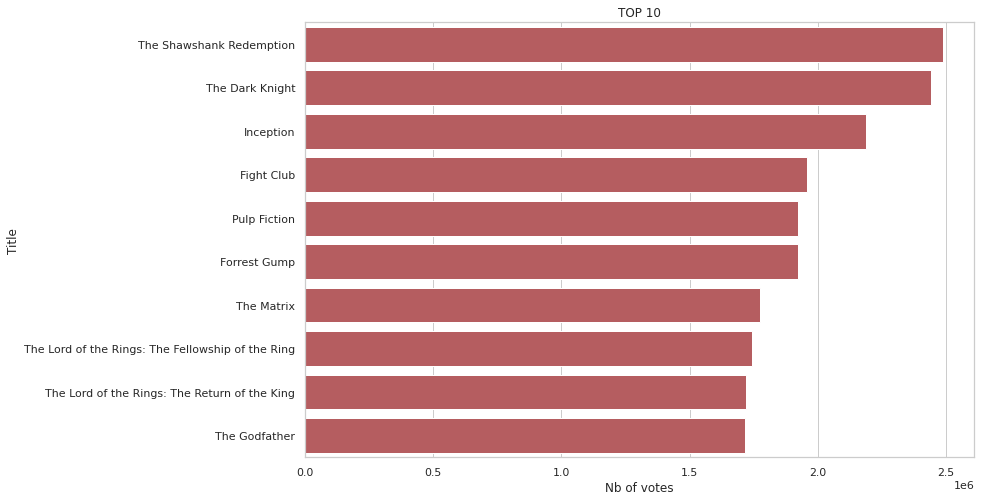

In [ ]:
#Visualisation top 10 films par nombre de votes 

sns.set(rc = {'figure.figsize':(12,8)})

sns.set_style("whitegrid")

sns.color_palette("rocket")

ax=sns.barplot(x ="numVotes", 
            y="primaryTitle", 
            data=pivottable10films.reset_index(),
            color="r")

plt.title('TOP 10')

ax.set(xlabel='Nb of votes', ylabel='Title')

plt.show()

#TOP 20, TOP 50, TOP 100...

In [ ]:
# Possibilité d'afficher un top 20,50, 100... en changeant simplement l'indice

#LES GENRES LES PLUS REPRÉSENTÉS PARMI LES MEILLEURS FILMS

In [ ]:
title_basics_plus_title_ratings

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN,4.5,14
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography",6.1,736
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama,5.2,16
tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,NaN,NaN,Drama,4.5,23
tt0000630,movie,Hamlet,Amleto,0,1908,NaN,NaN,Drama,3.8,23
...,...,...,...,...,...,...,...,...,...,...
tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,90,"Action,Adventure,Thriller",3.6,226
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,NaN,84,Thriller,5.8,1213
tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History",6.4,4073


In [ ]:
#Séparer les genres 

title_basics_plus_title_ratings2 = title_basics_plus_title_ratings['genres'].str.split(',', expand=True)

In [ ]:
#Création genre 1, 2 et 3

title_basics_plus_title_ratings['genre 1'] = title_basics_plus_title_ratings2[0]
title_basics_plus_title_ratings['genre 2'] = title_basics_plus_title_ratings2[1]
title_basics_plus_title_ratings['genre 3'] = title_basics_plus_title_ratings2[2]

In [ ]:
title_basics_plus_title_ratings

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,genre 1,genre 2,genre 3
tconst,,,,,,,,,,,,,
tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN,4.5,14,NaN,NaN,NaN
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography",6.1,736,Action,Adventure,Biography
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama,5.2,16,Drama,None,None
tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,NaN,NaN,Drama,4.5,23,Drama,None,None
tt0000630,movie,Hamlet,Amleto,0,1908,NaN,NaN,Drama,3.8,23,Drama,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,90,"Action,Adventure,Thriller",3.6,226,Action,Adventure,Thriller
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,NaN,84,Thriller,5.8,1213,Thriller,None,None
tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History",6.4,4073,Drama,History,None


In [ ]:
title_basics_plus_title_ratings = title_basics_plus_title_ratings.drop(columns=['genre 2','genre 3'])

In [ ]:
title_basics_plus_title_ratings.sort_values(['numVotes'], ascending=[False])

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,genre 1
tconst,,,,,,,,,,,
tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,NaN,142,Drama,9.3,2486414,Drama
tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,NaN,152,"Action,Crime,Drama",9.0,2440141,Action
tt1375666,movie,Inception,Inception,0,2010,NaN,148,"Action,Adventure,Sci-Fi",8.8,2189734,Action
tt0137523,movie,Fight Club,Fight Club,0,1999,NaN,139,Drama,8.8,1959020,Drama
tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,NaN,154,"Crime,Drama",8.9,1923329,Crime
...,...,...,...,...,...,...,...,...,...,...,...
tt8836604,movie,Lazy Hitchhikers' Tour de Europe,Lazy Hitchhikers' Tour de Europe,0,2013,NaN,105,Documentary,6.8,5,Documentary
tt5539404,movie,La nueva Medellín,La nueva Medellín,0,2016,NaN,85,Documentary,6.0,5,Documentary
tt8481472,movie,Huahua,Huahua,0,2017,NaN,69,Documentary,7.2,5,Documentary


In [ ]:
pivottablegenrestop100films = pd.pivot_table(title_basics_plus_title_ratings, values=['numVotes'], index =['primaryTitle','genre 1'])

In [ ]:
pivottablegenrestop100films = pivottablegenrestop100films.sort_values(['numVotes'], ascending=[False])

In [ ]:
pivottablegenrestop100films = pivottablegenrestop100films.reset_index()

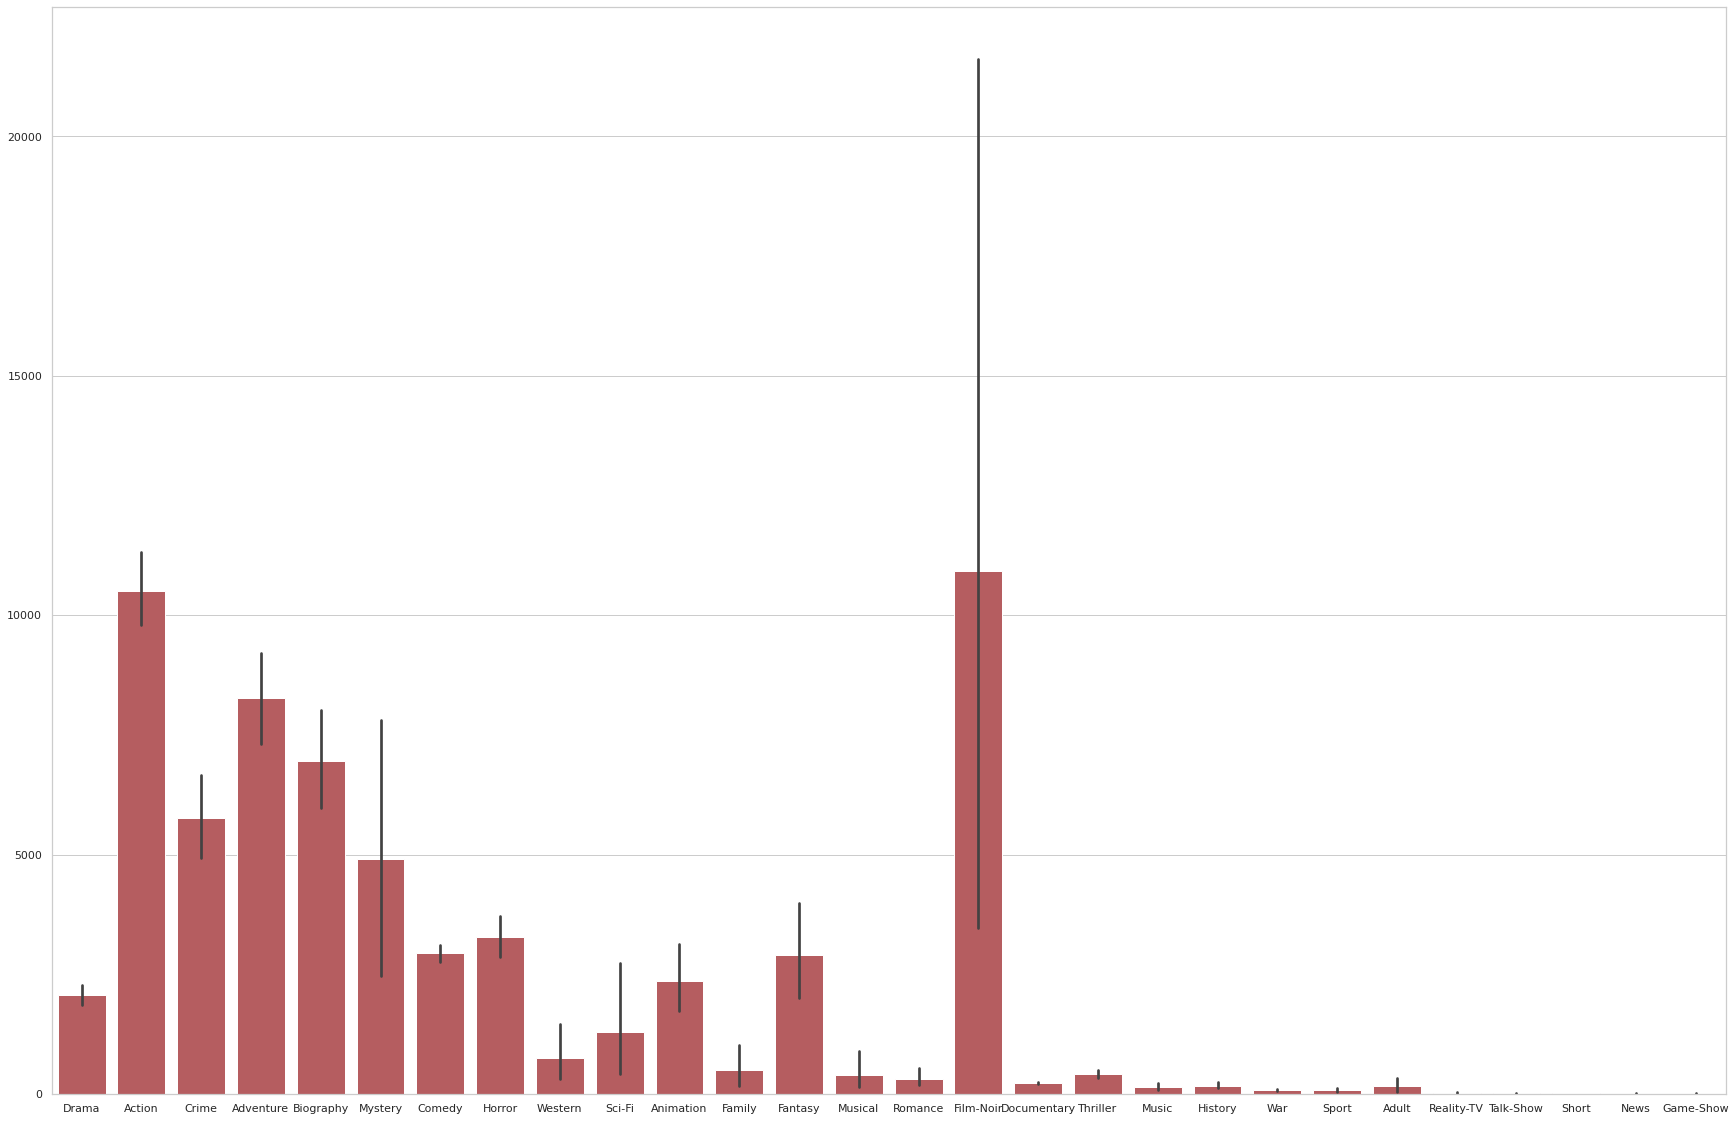

In [ ]:
#Visualisation genres des tops 100 films 

sns.set(rc = {'figure.figsize':(30,20)})

sns.set_style("whitegrid")

sns.color_palette("rocket")

ax=sns.barplot(x ="genre 1", 
            y="numVotes", 
            data=pivottablegenrestop100films.reset_index(),
            color="r")

plt.title('')

ax.set(xlabel='', ylabel='')

plt.show()

In [ ]:
#Films noirs, action et aventure, les genres les plus représentés parmi le top100 

In [ ]:
#runtimeMinute à convertir en int, avant ça NA=0 dans la colonne

In [ ]:
title_basics_plus_title_ratings2 = title_basics_plus_title_ratings.copy()

In [ ]:
title_basics_plus_title_ratings2['runtimeMinutes'] = title_basics_plus_title_ratings2['runtimeMinutes'].fillna(0)

In [ ]:
title_basics_plus_title_ratings2['runtimeMinutes'] = title_basics_plus_title_ratings2['runtimeMinutes'].astype('int64')

In [ ]:
title_basics_plus_title_ratings2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266287 entries, tt0000502 to tt9916538
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   titleType       266287 non-null  object 
 1   primaryTitle    266287 non-null  object 
 2   originalTitle   266287 non-null  object 
 3   isAdult         266287 non-null  object 
 4   startYear       266262 non-null  object 
 5   endYear         0 non-null       object 
 6   runtimeMinutes  266287 non-null  int64  
 7   genres          256275 non-null  object 
 8   averageRating   266287 non-null  float64
 9   numVotes        266287 non-null  int64  
 10  genre 1         256275 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 34.4+ MB


In [ ]:
pivottableruntimeminutestop100films = pd.pivot_table(title_basics_plus_title_ratings2, values=['runtimeMinutes','numVotes'], index =['primaryTitle'])

In [ ]:
pivottableruntimeminutestop100films = pivottableruntimeminutestop100films.reset_index()

In [ ]:
pivottableruntimeminutestop100films = pivottableruntimeminutestop100films.sort_values(['numVotes'], ascending=[False])

In [ ]:
pivottableruntimeminutestop100films = pivottableruntimeminutestop100films.sort_values(['numVotes'], ascending=[False])[:100]

In [ ]:
# Visualisation durée des films du top 100 

fig = px.histogram(pivottableruntimeminutestop100films, 
                   x = 'runtimeMinutes'
                   )
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(title_text='Duration')
fig.update_yaxes(title_text='Numbers of movies in the Top 100')

px.defaults.width = 900
px.defaults.height = 700

fig.update_traces(marker_color='red')

fig.show()

In [ ]:
pivottableruntimeminutestop100films.describe()

,numVotes,runtimeMinutes
count,1.000000e+02,100.000000
mean,1.061559e+06,132.110000
std,3.895092e+05,24.813199
min,7.009120e+05,81.000000
25%,7.895715e+05,116.000000
50%,9.376820e+05,129.000000
75%,1.209321e+06,144.500000
max,2.486414e+06,202.000000


#FLOP 10 : LES 10 PIRES FILMS ...

In [ ]:
pivottable10worstfilms = title_basics_plus_title_ratings_pivot_1.sort_values(['averageRating'], ascending=[False])[-10:]

In [ ]:
pivottable10worstfilms

,,averageRating,numVotes
primaryTitle,genres,,
Momok Jangan Cari Pasal!,Comedy,1.0,8.0
Der Schuldschein des Pandola,"Adventure,Crime",1.0,6.0
Yurameku,"Fantasy,Mystery,Romance",1.0,544.0
Das Gesetz der Wüste,Adventure,1.0,13.0
Die Schmuggler von San Diego,"Adventure,Crime",1.0,10.0
The Struggle,"Adventure,Drama",1.0,16.0
Chun jie xin ling: Zhu meng yan yi quan,"Comedy,Drama",1.0,589.0
Hearts Are Trump,Drama,1.0,23.0
The Adventurer,"Adventure,Drama,History",1.0,20.0


In [ ]:
pivottable10worstfilms.sort_values(['numVotes'], ascending=[False])

,,averageRating,numVotes
primaryTitle,genres,,
Badang,"Action,Comedy,Fantasy",1.0,745.0
Chun jie xin ling: Zhu meng yan yi quan,"Comedy,Drama",1.0,589.0
Yurameku,"Fantasy,Mystery,Romance",1.0,544.0
Hearts Are Trump,Drama,1.0,23.0
The Adventurer,"Adventure,Drama,History",1.0,20.0
The Struggle,"Adventure,Drama",1.0,16.0
Das Gesetz der Wüste,Adventure,1.0,13.0
Die Schmuggler von San Diego,"Adventure,Crime",1.0,10.0
Momok Jangan Cari Pasal!,Comedy,1.0,8.0


In [ ]:
pivottable10worstfilms = pivottable10worstfilms.sort_values(['numVotes'], ascending=[False])

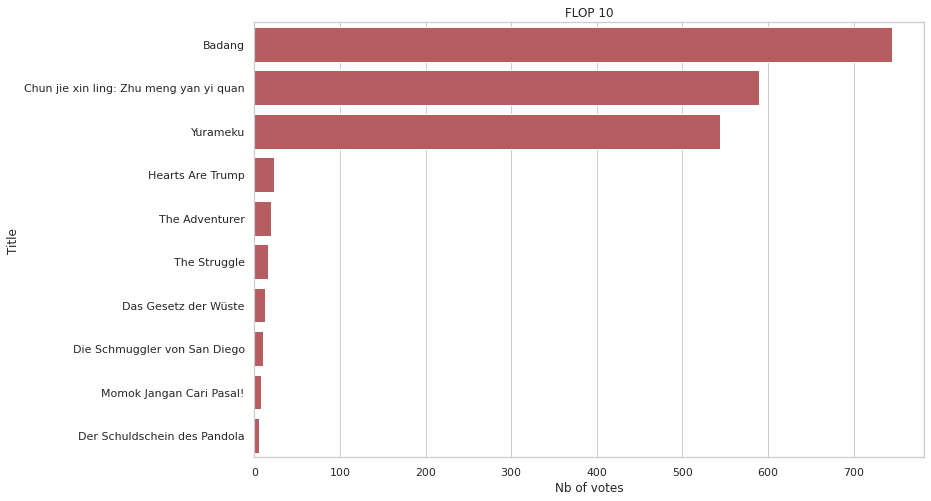

In [ ]:
#Visualisation flop 10, pires films tirés par nombre de votes

sns.set(rc = {'figure.figsize':(12,8)})

sns.set_style("whitegrid")

sns.color_palette("rocket")

ax=sns.barplot(x ="numVotes", 
            y="primaryTitle", 
            data=pivottable10worstfilms.reset_index(),
            color="r")

plt.title('FLOP 10')

ax.set(xlabel='Nb of votes', ylabel='Title')

plt.show()

In [ ]:
pivottablegenresflop100films = pd.pivot_table(title_basics_plus_title_ratings, values=['numVotes', 'averageRating'], index =['primaryTitle','genre 1'])

In [ ]:
pivottablegenresflop100films.reset_index()

,primaryTitle,genre 1,averageRating,numVotes
0,!Women Art Revolution,Documentary,6.8,244.0
1,#1 Serial Killer,Horror,5.5,57.0
2,#5,Biography,6.1,13.0
3,#66,Action,6.0,27.0
4,"#73, Shaanthi Nivaasa",Drama,7.0,203.0
...,...,...,...,...
244482,"Üç, Iki, Bir... Kestik!",Comedy,3.6,106.0
244483,Üçünüzü de mihlarim,Adventure,6.3,32.0
244484,Þegiðu og syntu,Documentary,9.2,11.0
244485,à propos: philosophie,Documentary,8.2,7.0


#LES GENRES LES PLUS REPRÉSENTÉS PARMI LES PIRES FILMS

In [ ]:
pivottablegenresflop100films = pivottablegenresflop100films.sort_values(['averageRating'], ascending=[False])[-100:]

In [ ]:
pivottablegenresflop100films = pivottablegenresflop100films.sort_values(['numVotes'], ascending=[False])[-100:]

In [ ]:
pivottablegenresflop100films = pivottablegenresflop100films.reset_index()

In [ ]:
pivottablegenresflop100films

,primaryTitle,genre 1,averageRating,numVotes
0,Cumali Ceber,Comedy,1.0,38506.0
1,321 Action,Drama,1.0,9376.0
2,Holnap történt - A nagy bulvárfilm,Comedy,1.0,839.0
3,Badang,Action,1.0,745.0
4,Chun jie xin ling: Zhu meng yan yi quan,Comedy,1.0,589.0
...,...,...,...,...
95,13 Needles,Adventure,1.0,7.0
96,Raul Roldan,Action,1.0,6.0
97,Der Schuldschein des Pandola,Adventure,1.0,6.0
98,Project 74,Crime,1.0,6.0


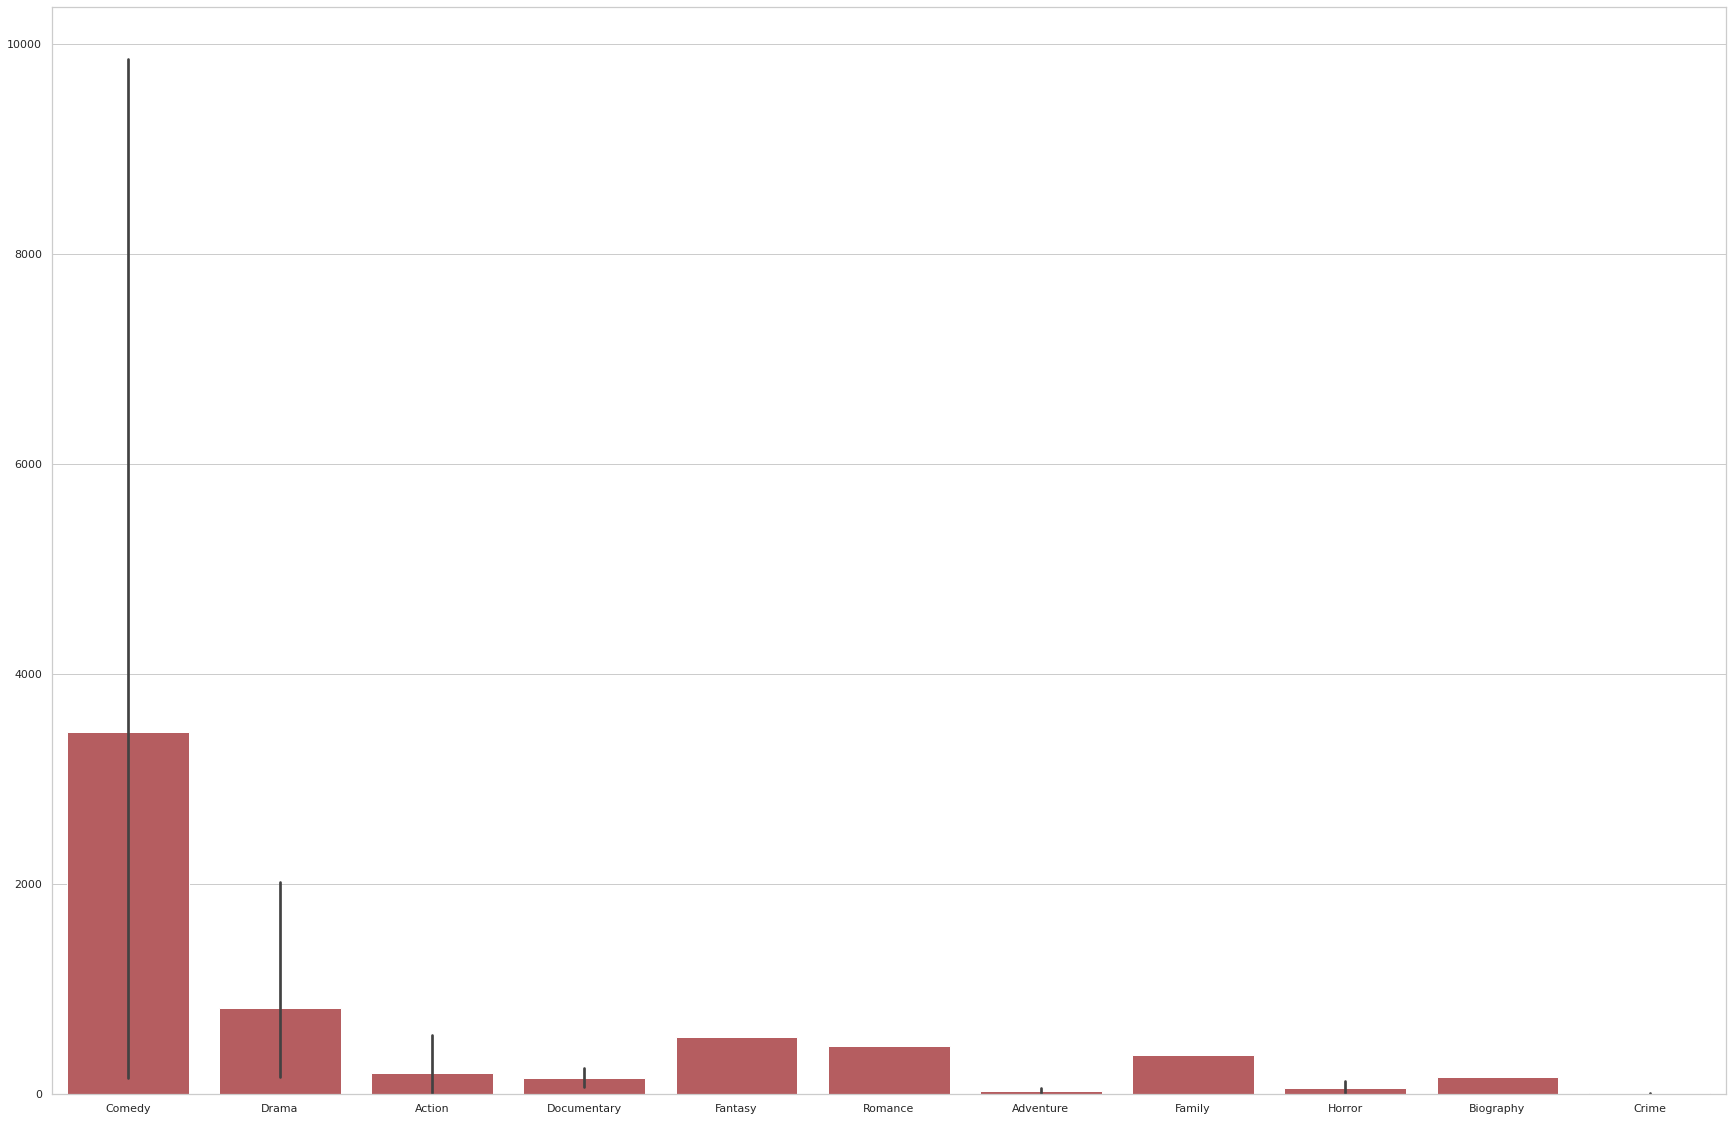

In [ ]:
#Visualisation des genres les plus représentés du flop 100

sns.set(rc = {'figure.figsize':(30,20)})

sns.set_style("whitegrid")

sns.color_palette("rocket")

ax=sns.barplot(x ="genre 1", 
            y="numVotes", 
            data=pivottablegenresflop100films.reset_index(),
            color="r")

plt.title('')

ax.set(xlabel='', ylabel='')

plt.show()

In [ ]:
#Comédie et drama et fantaisie sont les genres les plus représentés chez les pires films

In [ ]:
#Enregistrer directement dans Google Drive 

#from google.colab import drive
#drive.mount('drive')

In [ ]:
#Enregistrer le CSV 

#title_basics_plus_title_ratings.to_csv('title_basics_plus_title_ratings.csv')
#!cp title_basics_plus_title_ratings.csv "drive/My Drive/"